# Project 3 Group 27 

Zainab Almheiri
Renato Salinas Gallo
M. Amini


# Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Image Preprocessing



In [1]:
import numpy as np
import pandas as pd

import cv2 as cv

from keras import datasets

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

from keras import utils
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Convert Images to grayScale channel=1
def ImagePreprocessing1 (imagefile):
    preprocessedImages = []
    for index in range(len(imagefile)):
        image = imagefile[index]
        #spliting image into its channels
        #blue, green, red = cv.split(image) 
        #Converting image into grayscale
        imageGrayScale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        #Image tthreshold (#or 127)
        r, thresh = cv.threshold(imageGrayScale,120,255,cv.THRESH_BINARY)
        #ret, thresh = cv.threshold(imgray, 127, 255, 0)
        #Draw contours
        contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

        value = 0
        Contour = None
        for contour in contours: 
            x,y,w,h = cv.boundingRect(contour)
            if max(w,h) > value:
              value = max(w,h)
              Contour = contour

        (x,y,w,h) = cv.boundingRect(Contour)
        preprocessedImage = np.zeros((32,32))
        preprocessedImage[y:y+h+1,x:x+w+1] = thresh[y:y+h+1,x:x+w+1]
        preprocessedImages.append(preprocessedImage)
        Images_Array = np.array(preprocessedImages)

    return Images_Array

In [3]:
# Download and prepare the dataset
(training_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#file Shapes
print(training_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
#file Types
print(type(training_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Training Dataset
#Gray Images
#Image preprocessing,normalization, one hot encoding labels, and data spliting for validation and training

#Friday: Only simple preprocessing no color is used, no test is implemented yet.

#1. Image preprocess
#train_images = ImagePreprocessing1 (training_images)
#test_imagess = ImagePreprocessing1 (test_images)

#2. Image reshape to width hight pixel
train_images_x = training_images.reshape(training_images.shape[0], 32, 32, 3).astype('float32')
test_images_x = test_images.reshape(test_images.shape[0], 32, 32, 3).astype('float32') 
print (train_images_x.shape)
print (test_images_x.shape)

#3. one hot encoding for labels
#train_y = train_labels.astype('float32')
#test_y = test_labels.astype('float32') 
train_y = utils.to_categorical(train_labels, num_classes=None, dtype='float32')
print (train_y.shape)
test_y = utils.to_categorical(test_labels, num_classes=None, dtype='float32')
print (test_y.shape)

#4. Data normalization for pixels to be between 0 and 1
train_x_images= train_images_x/255.0
test_x_images= test_images_x/255.0

#5. Data Spliting
#train_X = train_x_images[:25000]
#valid_x = train_x_images[25000:]
#y_train = train_y[:25000]
#y_valid = train_y[25000:]


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


#Model Implementation
## Model 1: CNN


#Data Augumentation 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [0]:
#Data Augumentation 
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=15,  
        zoom_range = 0.15,  
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

In [0]:
datagen.fit(train_x_images)

In [0]:
#Data Spliting
train_X = train_x_images[:25000]
valid_x = train_x_images[25000:]
y_train = train_y[:25000]
y_valid = train_y[25000:]

In [0]:
#Without Data Augumentation
def model ():
  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same',kernel_initializer='lecun_normal',input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(64, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(Dropout(0.20))
  model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same',kernel_initializer='lecun_normal'))
  model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(Dropout(0.20))
  model.add(layers.Conv2D(128, kernel_size=(3, 3), strides=(1,1), activation='relu',padding='same',kernel_initializer='lecun_normal'))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.25))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [0]:
#Implement the model
model = model()


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

#Model: CNN-3

In [12]:
#Model: CNN-3
#Data Spliting (Data Augumentation)
batch_size = 64
model_Reg = model.fit_generator(datagen.flow(train_X, y_train, batch_size=batch_size),\
                    steps_per_epoch=train_X.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(valid_x,y_valid))


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/125
390/390 [==============================] - 105s 270ms/step - loss: 1.9185 - accuracy: 0.2875 - val_loss: 1.5065 - val_accuracy: 0.4486
Epoch 2/125
390/390 [==============================] - 106s 271ms/step - loss: 1.5851 - accuracy: 0.4245 - val_loss: 1.4834 - val_accuracy: 0.4827
Epoch 3/125
390/390 [==============================] - 105s 269ms/step - loss: 1.4240 - accuracy: 0.4877 - val_loss: 1.1814 - val_accuracy: 0.5720
Epoch 4/125
390/390 [==============================] - 106s 271ms/step - loss: 1.3072 - accuracy: 0.5377 - val_loss: 1.1482 - val_accuracy: 0.5922
Epoch 5/125
390/390 [==============================] - 106s 271ms/step - loss: 1.2322 - accuracy: 0.5629 - val_loss: 1.0908 - val_accuracy: 0.6094
Epoch 6/125
390/390 [==============================] - 105s 270ms/step - loss: 1.1696 - accuracy: 0.5893 - val_loss: 1.1975 - val_accuracy: 0.5913
Epoch 7/125
390/390 [=====================

In [13]:
#Model: CNN-3
#model evaluate with Data Augumentation. 
scores = model.evaluate(test_x_images, test_y,verbose=1)
print("Prediction: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 8s 25ms/step - loss: 0.7968 - accuracy: 0.7911
Prediction: 79.11%


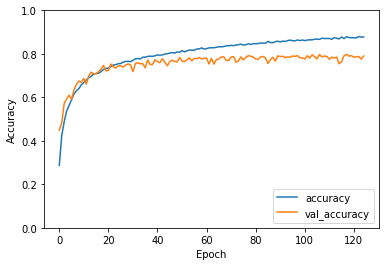

In [14]:
plt.plot(model_Reg.history['accuracy'], label='accuracy')
plt.plot(model_Reg.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) #0.5,1
plt.legend(loc='lower right')

#Model: CNN-2

In [0]:
#Model: CNN-2
#Data Spliting (No Data Augumentation)
train_X = train_x_images[:25000]
valid_x = train_x_images[25000:]
y_train = train_y[:25000]
y_valid = train_y[25000:]

In [0]:
#Model: CNN-2
#Train the model (No Data Augumentation)
#Fit the model
CNN_Trian_Model= model.fit(train_X, y_train, epochs=10, validation_data=(valid_x, y_valid))


Epoch 1/10
782/782 [==============================] - 188s 240ms/step - loss: 1.7717 - accuracy: 0.3474 - val_loss: 1.5410 - val_accuracy: 0.4495
Epoch 2/10
782/782 [==============================] - 185s 236ms/step - loss: 1.3658 - accuracy: 0.5123 - val_loss: 1.1983 - val_accuracy: 0.5681
Epoch 3/10
782/782 [==============================] - 186s 238ms/step - loss: 1.1548 - accuracy: 0.5932 - val_loss: 1.0390 - val_accuracy: 0.6331
Epoch 4/10
782/782 [==============================] - 190s 243ms/step - loss: 1.0200 - accuracy: 0.6440 - val_loss: 1.0055 - val_accuracy: 0.6505
Epoch 5/10
782/782 [==============================] - 186s 238ms/step - loss: 0.9214 - accuracy: 0.6844 - val_loss: 0.9167 - val_accuracy: 0.6793
Epoch 6/10
782/782 [==============================] - 187s 239ms/step - loss: 0.8300 - accuracy: 0.7184 - val_loss: 0.8577 - val_accuracy: 0.7038
Epoch 7/10
782/782 [==============================] - 187s 239ms/step - loss: 0.7659 - accuracy: 0.7385 - val_loss: 0.8261 -

In [0]:
print(train_X.shape)
print(y_train.shape)

(25000, 32, 32, 3)
(25000, 1)


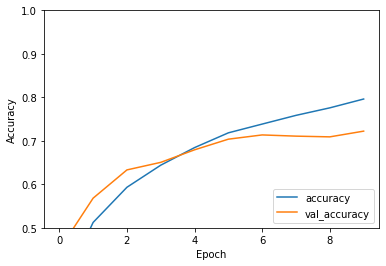

In [0]:
plt.plot(CNN_Trian_Model.history['accuracy'], label='accuracy')
plt.plot(CNN_Trian_Model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1]) #0.5,1
plt.legend(loc='lower right')

In [0]:
#Please use Model.fit, which supports generators. (thus I wont use this)
#Evaluate the model using test sets
scores = model.evaluate(test_x_images, test_y,verbose=1)
#evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

print("Prediction: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 15s 48ms/step - loss: 0.8500 - accuracy: 0.7206
Prediction: 72.06%


# Model 3: GoogleNet or Inception v1


In [0]:
import keras
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
#from keras.datasets import cifar10
import cv2 as cv
import numpy as np 
from keras import datasets
from keras import backend as K 
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = datasets.cifar10.load_data()

    # Resize training images
    X_train = np.array([cv.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid

In [0]:
X_train, y_train, X_valid, y_valid = load_cifar10_data(224, 224)

In [0]:
# Define the architecture of GoogleNet (Deep Learning)
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    return output

In [0]:
import keras
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

Using TensorFlow backend.


In [0]:
from keras.layers import Input

input_layer = Input(shape=(224, 224, 3))

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import GlobalAveragePooling2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten

In [0]:
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

In [0]:
from keras.models import Model

In [0]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [0]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [0]:
import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [0]:
#Loss function for each output layer
#Weightage assigned to that output layer
#Optimization function, which is modified to include a weight decay after every 8 epochs
#Evaluation metric

epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

In [0]:
#Training the model
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_valid, [y_valid, y_valid, y_valid]), epochs=epochs, batch_size=256, callbacks=[lr_sc])

NameError: ignored

In [0]:
#Model Evaluation 
scores = model.evaluate(test_x_images, test_y,verbose=1)